<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/Gaussian%20Mixture%20Model%20(GMM)%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# make_blobs() 로 300개의 데이터를 생성한다.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

In [ ]:
# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [ ]:
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

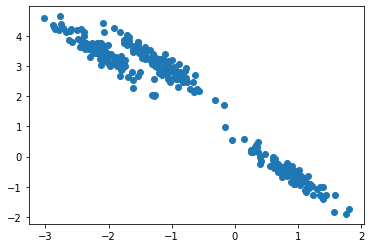

In [ ]:
# 데이터 시각화
plt.scatter(clusterDF['ftr1'], clusterDF['ftr2'])
plt.show()

In [ ]:
# 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(model, df, label_name, iscenter=True):
    if iscenter :
        centers = model.cluster_centers_
        
    unique_labels = np.unique(df[label_name].values)
    markers=['o', 's', '^', 'x', '*']

    for label in unique_labels:
        label_cluster = df[df[label_name]==label]
        cluster_legend = 'Cluster ' + str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_xy = centers[label]
            plt.scatter(x=center_xy[0], y=center_xy[1], s=250, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_xy[0], y=center_xy[1], s=70, color='k', marker='$%d$' % label)
            # https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers <-- '$...$'

    legend_loc='upper right'
    plt.legend(loc=legend_loc)
    plt.show()

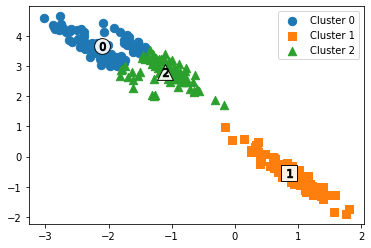

In [ ]:
# KMeans clustering
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

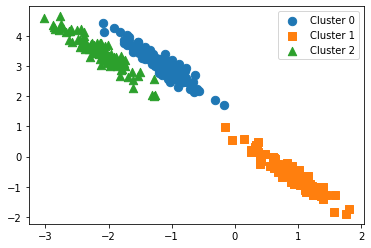

In [ ]:
# GMM clustering
gmm = GaussianMixture(n_components=3).fit(X_aniso)
gmm_cluster_labels = gmm.predict(X_aniso)
clusterDF['gmm_cluster'] = gmm_cluster_labels

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

# p = gmm.predict_proba(X_aniso)
# cluster = np.argmax(p, axis=1)
# (gmm_cluster_labels != cluster).sum()